In [71]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.cm import ScalarMappable
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

In [72]:
# Float Tag is the efficiency and this is from 2015
flowtag_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYTCY6CdT7hGiW-T9RdLVfgFTQq7q9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkd8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Daily total
dailytotal_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYTCY6CdT7hGiW-T9RdLVfg_XDEejkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkd8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# outdoor temperature
outtemp_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwYTCY6CdT7hGiW-T9RdLVfgQXWKITUNy1YUbMPkaT6rPwSVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkd8T1VURE9PUiBURU1QRVJBVFVSRQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# precipitation
prec_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAfQwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX0xTXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# humitidy
hum_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAgQQAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX01UXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Barometric pressure
bar_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAfAwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX1BUXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Wind Speed
wind_summary_hourly_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1DPQfqY_bGnwEKLycN0yWeqGAewwAAAUElTRVJWRVIuRkFDSUxJVElFUy5VSU9XQS5FRFVcV0NQXzAwX1NUXzA5MQ/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 6k 1
Electric_sub6k1_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwAoPNbSlT7hGiW-T9RdLVfgdod_a6FxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDZLIDF8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub6k1_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwAoPNbSlT7hGiW-T9RdLVfgnsOR_zcXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDZLIDF8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 1
Electric_sub7k1_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwwCi3SjdT7hGiW-T9RdLVfgtCwFTL9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDF8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub7k1_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwwCi3SjdT7hGiW-T9RdLVfgXGjr2CkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDF8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 2
Electric_sub7k2_flow_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWw5MHAtjdT7hGiW-T9RdLVfgkMVysL9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDJ8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub7k2_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWw5MHAtjdT7hGiW-T9RdLVfgeIGcJCkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDJ8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 3
Electric_sub7k3_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwZDoD3DdT7hGiW-T9RdLVfgED6x2r9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDN8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub7k3_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwZDoD3DdT7hGiW-T9RdLVfg-HpfTikXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDN8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 4
Electric_sub7k4_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwFhpd5zdT7hGiW-T9RdLVfgYh7v4b9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDR8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub7k4_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwFhpd5zdT7hGiW-T9RdLVfgiloBdSkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDR8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 5
Electric_sub_7k5_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwqCTL9jdT7hGiW-T9RdLVfg3CB58L9xNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDV8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub_7k5_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWwqCTL9jdT7hGiW-T9RdLVfgNGSXZCkXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDV8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

# Electric Vehicle Charging sub array 7k 6
Electric_sub_7k6_flow_url  = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWws_ZwAThT7hGiW-T9RdLVfgx_LCB7BxNVULugR7j2EabASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDZ8RkxPVyBUQUc/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'
Electric_sub_7k6_total_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/streams/F1AbEAVYciAZHVU6DzQbJjxTxWws_ZwAThT7hGiW-T9RdLVfgL7YskyYXN1c8B8kKhkXr4ASVRTTlQyMjU5XFJZQU4gU0FOREJPWFxTT0xBUiBQUk9EVUNUSU9OXEVMRUNUUklDIFZFSElDTEUgQ0hBUkdJTkdcU09MQVIgQ09MTEVDVE9SIDdLIDZ8REFJTFkgVE9UQUw/summary?starttime=2018-01-01%2000:00:00%20&endtime=2020-12-31%2023:00:00&summaryType=Average&summaryDuration=1h'

electric_sub_array_flow_url =[Electric_sub6k1_flow_url,Electric_sub7k1_flow_url,Electric_sub7k2_flow_url,Electric_sub7k3_flow_url,Electric_sub7k4_flow_url,Electric_sub_7k5_flow_url,Electric_sub_7k6_flow_url]
electric_sub_array_total_url = [Electric_sub6k1_total_url,Electric_sub7k1_total_url,Electric_sub7k2_total_url,Electric_sub7k3_total_url,Electric_sub7k4_total_url,Electric_sub_7k5_total_url,Electric_sub_7k6_total_url]

headers = {'user-agent':'Mozilla/5.0'}
username = "iowa\\"
password = ""

response_flowtag = requests.get(flowtag_summary_hourly_url, headers=headers, auth=(username,password))
json_data_flowtag = json.loads(response_flowtag.text)["Items"]

response_dailytotal = requests.get(dailytotal_summary_hourly_url, headers=headers, auth=(username,password))
json_data_dailytotal = json.loads(response_dailytotal.text)["Items"]

response_outtemp = requests.get(outtemp_summary_hourly_url, headers=headers, auth=(username,password))
json_data_outtemp = json.loads(response_outtemp.text)["Items"]

response_prec = requests.get(prec_summary_hourly_url, headers=headers, auth=(username,password))
json_data_prec = json.loads(response_prec.text)["Items"]

response_hum = requests.get(hum_summary_hourly_url, headers=headers, auth=(username,password))
json_data_hum = json.loads(response_hum.text)["Items"]

response_bar = requests.get(bar_summary_hourly_url, headers=headers, auth=(username,password))
json_data_bar = json.loads(response_bar.text)["Items"]

response_wind = requests.get(wind_summary_hourly_url, headers=headers, auth=(username,password))
json_data_wind = json.loads(response_wind.text)["Items"]

json_data_flow = []
json_data_total = []

for i in range(len(electric_sub_array_flow_url)):
  response_flow = requests.get(electric_sub_array_flow_url[i], headers=headers, auth=(username,password))
  json_data_flow.append(json.loads(response_flow.text)["Items"])
  response_total = requests.get(electric_sub_array_total_url[i], headers=headers, auth=(username,password))
  json_data_total.append(json.loads(response_total.text)["Items"])

In [3]:
dni_data_2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2018.csv")
dni_data_2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2019.csv")
dni_data_2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DNI Data 2020.csv")

dni_data = pd.concat([dni_data_2018,dni_data_2019,dni_data_2020], axis=0).reset_index()

# Transform Data

In [4]:
def summary_report(data):
  r, c = data.shape

  print("\nSummary\n")
  print(f"The shape of the dataset is " + str(r) + " rows and " + str(c) + " columns\n")

  for n in data.columns:
    col = data[n]
    print(col.describe())
    print(f"Sparicity is " + str(round(round(col.isna().sum() / r, 2) * 100, 2)) + "%")
    print("\n")

In [5]:
date = []

esub6k1_flow_tag = []
esub7k1_flow_tag = []
esub7k2_flow_tag = []
esub7k3_flow_tag = []
esub7k4_flow_tag = []
esub7k5_flow_tag = []
esub7k6_flow_tag = []
esub6k1_total_tag = []
esub7k1_total_tag = []
esub7k2_total_tag = []
esub7k3_total_tag = []
esub7k4_total_tag = []
esub7k5_total_tag = []
esub7k6_total_tag = []

for i in range(len(json_data_flow[0])):
  date.append(json_data_flow[0][i]["Value"]["Timestamp"])
  esub6k1_flow_tag.append(json_data_flow[0][i]["Value"]["Value"])
  esub7k1_flow_tag.append(json_data_flow[1][i]["Value"]["Value"])
  esub7k2_flow_tag.append(json_data_flow[2][i]["Value"]["Value"])
  esub7k3_flow_tag.append(json_data_flow[3][i]["Value"]["Value"])
  esub7k4_flow_tag.append(json_data_flow[4][i]["Value"]["Value"])
  esub7k5_flow_tag.append(json_data_flow[5][i]["Value"]["Value"])
  esub7k6_flow_tag.append(json_data_flow[6][i]["Value"]["Value"])
  esub6k1_total_tag.append(json_data_total[0][i]["Value"]["Value"])
  esub7k1_total_tag.append(json_data_total[1][i]["Value"]["Value"])
  esub7k2_total_tag.append(json_data_total[2][i]["Value"]["Value"])
  esub7k3_total_tag.append(json_data_total[3][i]["Value"]["Value"])
  esub7k4_total_tag.append(json_data_total[4][i]["Value"]["Value"])
  esub7k5_total_tag.append(json_data_total[5][i]["Value"]["Value"])
  esub7k6_total_tag.append(json_data_total[6][i]["Value"]["Value"])

date = pd.to_datetime(date)
esub6k1_flow = pd.Series(esub6k1_flow_tag)
esub7k1_flow = pd.Series(esub7k1_flow_tag)
esub7k2_flow = pd.Series(esub7k2_flow_tag)
esub7k3_flow = pd.Series(esub7k3_flow_tag)
esub7k4_flow = pd.Series(esub7k4_flow_tag)
esub7k5_flow = pd.Series(esub7k5_flow_tag)
esub7k6_flow = pd.Series(esub7k6_flow_tag)
esub6k1_total = pd.Series(esub6k1_total_tag)
esub7k1_total = pd.Series(esub7k1_total_tag)
esub7k2_total = pd.Series(esub7k2_total_tag)
esub7k3_total = pd.Series(esub7k3_total_tag)
esub7k4_total = pd.Series(esub7k4_total_tag)
esub7k5_total = pd.Series(esub7k5_total_tag)
esub7k6_total = pd.Series(esub7k6_total_tag)

esub_flow = [esub6k1_flow,esub7k1_flow,esub7k2_flow,esub7k3_flow,esub7k4_flow,esub7k5_flow,esub7k6_flow]
esub_total = [esub6k1_total,esub7k1_total,esub7k2_total,esub7k3_total,esub7k4_total,esub7k5_total,esub7k6_total]

date = pd.Series(date.tz_localize(None))

##  Datetime

In [6]:
date_col = ["Year","Month","Day","Hour","Minute"]

date_csv = []

for i in range(len(dni_data)):
  date_csv.append(f'{dni_data["Year"][i]}-{dni_data["Month"][i]}-{dni_data["Day"][i]}-{dni_data["Hour"][i]}')

dni_data.drop(columns=date_col, inplace=True)
dni_data["Date"] = pd.to_datetime(date_csv, format="%Y-%m-%d-%H").tz_localize(None)

In [7]:
date = []
flowtag = []
dailytotal = []
outtemp = []
prec = []
hum = []
bar = []
wind = []
data = []

for i in range(len(json_data_flowtag)):
  date.append(json_data_flowtag[i]["Value"]["Timestamp"])
  flowtag.append(json_data_flowtag[i]["Value"]["Value"])
  dailytotal.append(json_data_dailytotal[i]["Value"]["Value"])
  outtemp.append(json_data_outtemp[i]["Value"]["Value"])
  prec.append(json_data_prec[i]["Value"]["Value"])
  hum.append(json_data_hum[i]["Value"]["Value"])
  bar.append(json_data_bar[i]["Value"]["Value"])
  wind.append(json_data_wind[i]["Value"]["Value"])

print(len(flowtag))
date = pd.to_datetime(date)
flowtag = pd.Series(flowtag)
dailytotal = pd.Series(dailytotal)
outtemp = pd.Series(outtemp)
prec = pd.Series(prec)
hum = pd.Series(hum)
bar = pd.Series(bar)
wind = pd.Series(wind)

date = pd.Series(date.tz_localize(None))

26303


## Create Dataframe

In [8]:
df = pd.concat([date,flowtag,dailytotal,outtemp,prec,hum,bar,wind,dni_data.drop(columns={"Date","index"})], axis=1)

## Eliminating Outliers

In [9]:
# Create a sorted DataFrame and rename columns
columns={0:"Timestamp",1:"Flow Tag",2:"Daily Total",3:"Outdoor Temperature",4:"Precipitation",5:"Humidity",6:"Barometric Pressure",7:"Wind Speed"}
df = df.sort_values(0, ascending=True).rename(columns=columns).set_index("Timestamp")

In [10]:
period = 100

#Calculate flow tag delta
df["Flow Tag Delta"] = df["Flow Tag"].diff()

#Calculate 20-ma and std dev
df["Moving Average"] = df["Flow Tag"].rolling(period).mean()
df["Standard Deviation"] = df["Flow Tag"].rolling(period).std()

#Calculate bollinger bands using std dev
df["Upper Bolinger Band"] = df["Moving Average"] + (2 *df["Standard Deviation"])

<ipython-input-11-797162861fc8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{"Moving Average","Upper Bolinger Band"}].plot()


<Axes: xlabel='Timestamp'>

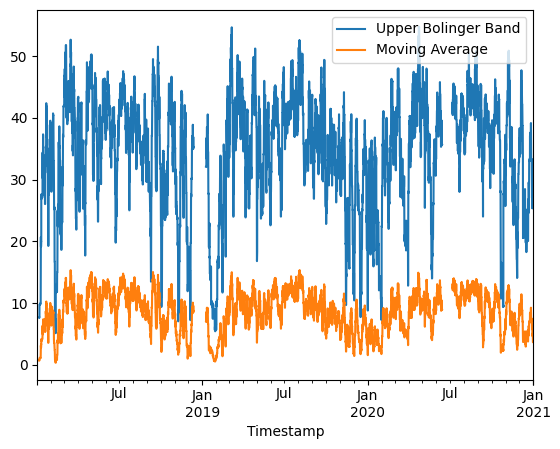

In [11]:
df[{"Moving Average","Upper Bolinger Band"}].plot()

In [12]:
for i in range(len(df)):
  if (df["Moving Average"][i]):
    if (df["Flow Tag"][i] > df["Upper Bolinger Band"][i]):
      df["Flow Tag"][i] = df["Moving Average"][i]

<ipython-input-13-a94fc80bb1ef>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{"Flow Tag","Moving Average"}].plot()


<Axes: xlabel='Timestamp'>

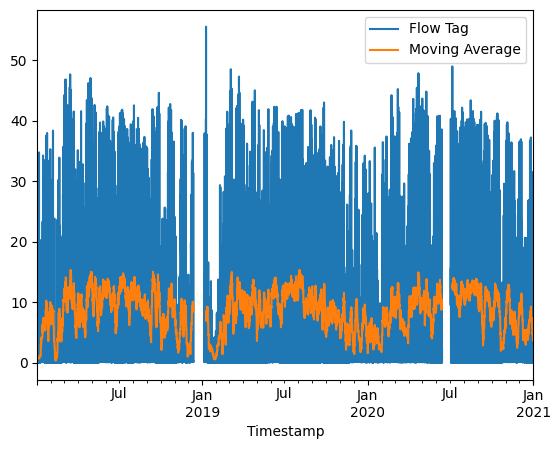

In [13]:
df[{"Flow Tag","Moving Average"}].plot()

In [14]:
# Drop outliers from the data
df = df[df["Flow Tag"] < 38]
len(df)

24789

In [15]:
# Drop 0 values
df = df[df['Flow Tag'] > 0]
len(df)

18536

In [16]:
# drop Null values

df.dropna(inplace=True)
len(df)

17957

# Plotting

## Plotting Subarrays

Text(0, 0.5, 'KW')

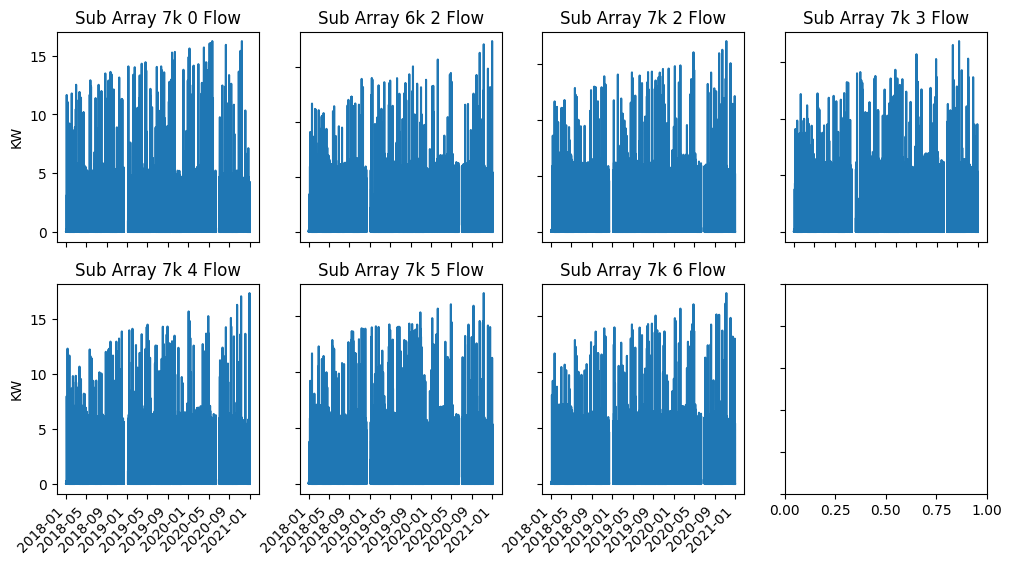

In [17]:
fig, ax = plt.subplots(2,4,figsize=(12,6))
x = np.asarray(date,dtype='datetime64[s]')
for i in range(len(esub_flow)):
  if(i-4<0):
    ax[0,i].plot(x,esub_flow[i])
    if(i==1):
      ax[0,i].set_title('Sub Array 6k {i} Flow'.format(i=str(i+1)))
    else:
      ax[0,i].set_title('Sub Array 7k {i} Flow'.format(i=str(i)))
  else:
    ax[1,i-4].plot(x,esub_flow[i])
    ax[1,i-4].set_title('Sub Array 7k {i} Flow'.format(i=str(i)))
    ax[1,i-4].tick_params(axis='x', labelrotation=45)
    for label in ax[1,i-4].get_xticklabels():
      label.set_horizontalalignment('right')

for axs in ax.flat:
  axs.label_outer()

ax[0,0].set_ylabel("KW")
ax[1,0].set_ylabel('KW')

<Axes: xlabel='Timestamp'>

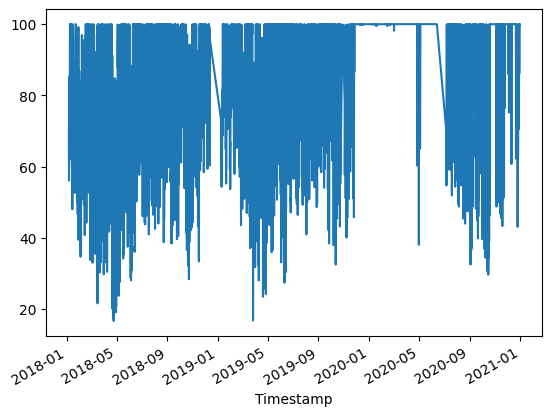

In [18]:
df["Humidity"].plot()

<Axes: xlabel='Timestamp'>

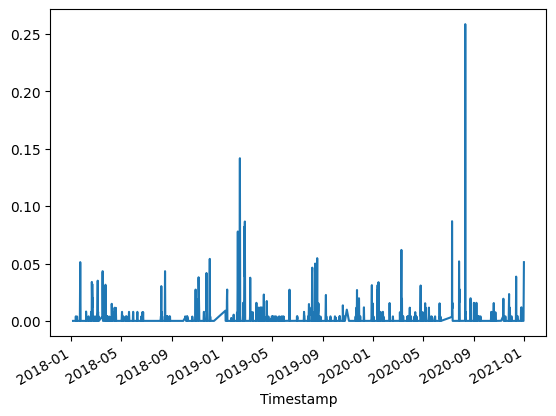

In [19]:
df["Precipitation"].plot()

<Axes: xlabel='Timestamp'>

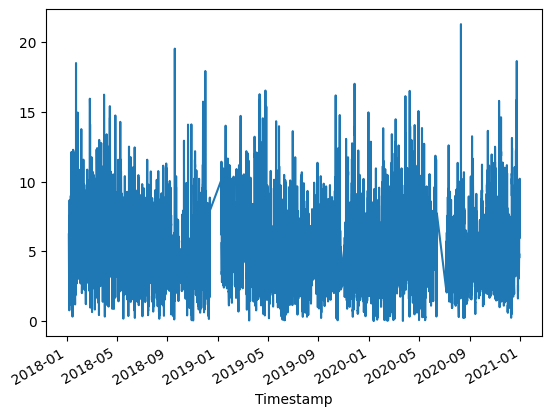

In [20]:
df["Wind Speed"].plot()

## Heatmap Correlation

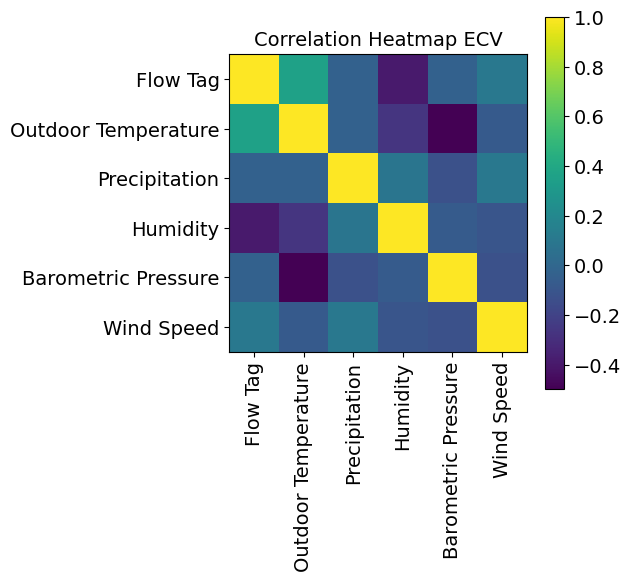

In [70]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Correlation Heatmap ECV", fontsize=14)
    plt.show()


show_heatmap(df[["Flow Tag","Outdoor Temperature","Precipitation","Humidity","Barometric Pressure","Wind Speed"]])

# Model Building

In [23]:
df_train1 = df[:16000]
df_test1 = df[16000:]

In [24]:
target_train1 = df_train1["Flow Tag"]
data_train1 = df_train1.drop(columns={"Flow Tag"})

target_test1 = df_test1["Flow Tag"]
data_test1 = df_test1.drop(columns={"Flow Tag"})

## Ridge Model

In [25]:
ridge1 = linear_model.RidgeCV()

In [26]:
ridge1.fit(data_train1,target_train1)

RidgeCV()

In [27]:
test_pred = ridge1.predict(data_test1)

In [28]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 78.26


In [29]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.27


## Bayes

In [30]:
bayes1 = linear_model.BayesianRidge()

In [31]:
bayes1.fit(data_train1,target_train1)

BayesianRidge()

In [32]:
test_pred = bayes1.predict(data_test1)

In [33]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 78.31


In [34]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.27


## Random Forest Regressor

In [35]:
rf1 = ensemble.RandomForestRegressor()

In [36]:
rf1.fit(data_train1,target_train1)

RandomForestRegressor()

In [37]:
test_pred = rf1.predict(data_test1)

In [38]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 24.55


In [39]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.77


## Descision Tree

In [40]:
tree1 = tree.DecisionTreeRegressor()

In [41]:
tree1.fit(data_train1,target_train1)

DecisionTreeRegressor()

In [42]:
test_pred = tree1.predict(data_test1)

In [43]:
print("Mean squared error: %.2f" % mean_squared_error(target_test1, test_pred))

Mean squared error: 48.83


In [44]:
print("Coefficient of determination: %.2f" % r2_score(target_test1, test_pred))

Coefficient of determination: 0.55


# Cut Features

In [45]:
columns = {"Daily Total","Clearsky DNI","Barometric Pressure"}
df_cut = df.drop(columns=columns)

In [46]:
df_train2 = df_cut[:16000]
df_test2 = df_cut[16000:]

In [47]:
target_train2 = df_train2["Flow Tag"]
data_train2 = df_train2.drop(columns={"Flow Tag"})

target_test2 = df_test2["Flow Tag"]
data_test2 = df_test2.drop(columns={"Flow Tag"})

## Ridge

In [48]:
ridge2 = linear_model.RidgeCV()

In [49]:
ridge2.fit(data_train2,target_train2)

RidgeCV()

In [50]:
test_pred = ridge2.predict(data_test2)

In [51]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 81.98


In [52]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.24


## Bayes

In [53]:
bayes2 = linear_model.BayesianRidge()

In [54]:
bayes2.fit(data_train2,target_train2)

BayesianRidge()

In [55]:
test_pred = bayes2.predict(data_test2)

In [56]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 81.94


In [57]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.24


## Random Forest Regressor

In [58]:
rf2 = ensemble.RandomForestRegressor()

In [59]:
rf2.fit(data_train2,target_train2)

RandomForestRegressor()

In [60]:
test_pred = rf2.predict(data_test2)

In [61]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 52.55


In [62]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.51


## Descision Tree Classifier

In [63]:
tree2 = tree.DecisionTreeRegressor()

In [64]:
tree2.fit(data_train2,target_train2)

DecisionTreeRegressor()

In [65]:
test_pred = tree2.predict(data_test2)

In [66]:
print("Mean squared error: %.2f" % mean_squared_error(target_test2, test_pred))

Mean squared error: 84.47


In [67]:
print("Coefficient of determination: %.2f" % r2_score(target_test2, test_pred))

Coefficient of determination: 0.22
